In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


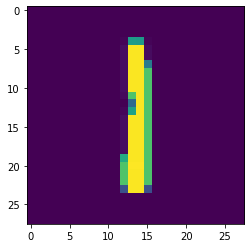

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

val_data = np.array(train["label"])
feed_data = np.array(train.drop(columns=['label'], errors='ignore'))

feed_data_norm = tf.keras.utils.normalize(feed_data, axis=1)

feed_data_test = np.array(test.drop(columns=['label'], errors='ignore'))

feed_data_norm_test = tf.keras.utils.normalize(feed_data_test, axis=1)


shape = (28, 28, 1)
image = feed_data_norm.reshape(-1, *shape)


plt.imshow(image[2])

plt.show()



In [3]:
import tensorflow as tf

Dim = 256

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

history = model.fit(feed_data_norm, val_data, epochs = 20)

2022-02-02 20:40:01.423249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 20:40:01.527177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 20:40:01.527980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 20:40:01.529214: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
1313/1313 [==============================] - 4s 2ms/step - loss: 1.0262 - accuracy: 0.6681
Epoch 2/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3676 - accuracy: 0.8879
Epoch 3/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2989 - accuracy: 0.9085
Epoch 4/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9184
Epoch 5/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2413 - accuracy: 0.9256
Epoch 6/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2200 - accuracy: 0.9311
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2025 - accuracy: 0.9372
Epoch 8/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1834 - accuracy: 0.9426
Epoch 9/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1698 - accuracy: 0.9475
Epoch 10/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.157

In [4]:
model.save("recog.model")

2022-02-02 20:41:27.553350: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [5]:
predictions = model.predict([feed_data_norm_test])

print(predictions)

[[4.37700777e-07 6.79727862e-07 9.99893188e-01 ... 3.13835047e-12
  3.20556364e-12 2.69056565e-12]
 [9.98610139e-01 3.77503852e-06 6.85178093e-04 ... 2.77401158e-10
  2.91120628e-10 3.46815271e-10]
 [7.04528418e-08 3.73105249e-05 2.13894441e-06 ... 5.47330757e-11
  5.65651380e-11 6.56372387e-11]
 ...
 [2.93938854e-07 1.81709474e-05 3.74910042e-06 ... 5.66050202e-12
  3.79335062e-12 4.60542411e-12]
 [3.81120003e-07 2.07784424e-07 7.29478529e-07 ... 2.07172612e-11
  1.86566422e-11 2.79165354e-11]
 [8.24293693e-07 4.86647696e-06 9.99335110e-01 ... 1.11883315e-11
  1.14688484e-11 8.40895756e-12]]


3


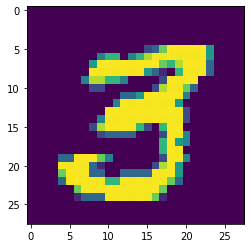

6


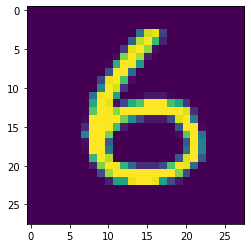

6


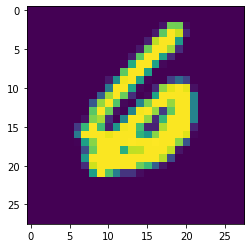

2


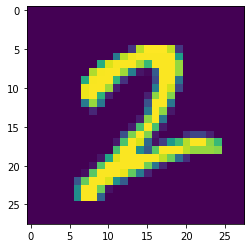

3


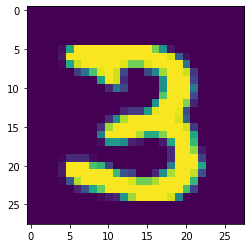

7


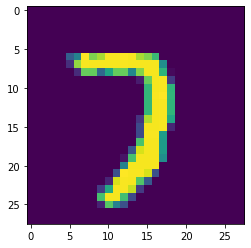

5


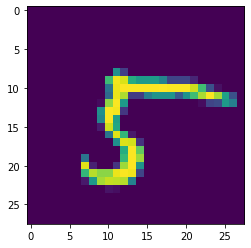

4


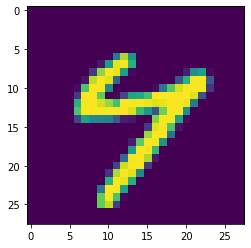

6


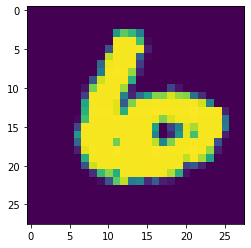

5


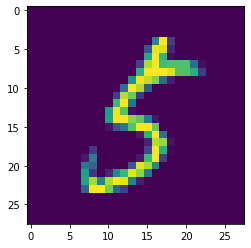

In [6]:
import numpy as np
import csv
import random

for x in range(0,10):
    imagenum = random.randint(0, len(predictions))
    print(np.argmax(predictions[imagenum]))

    shape = (28, 28, 1)
    image = feed_data_norm_test.reshape(-1, *shape)

    plt.imshow(image[imagenum])

    plt.show()




    
